In [6]:
#Importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Import the dataset and encode the date
df = pd.read_csv('../data/BTC-2021min.csv')
#df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['open'].mean()
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]
#process data
training_set=df_train.values
training_set=np.reshape(training_set, (len(training_set), 1))

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)
X_train= training_set[0:len(training_set)-1]
y_train= training_set[1:len(training_set)]

In [8]:
X_train= np.reshape(X_train, (len(X_train), 1, 1))

In [9]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNNregressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122151/122151 ━━━━━━━━━━━━━━━━━━━━ 43s 345us/step - loss: 0.0034
Epoch 2/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 42s 340us/step - loss: 7.6384e-06
Epoch 3/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 39s 321us/step - loss: 5.3542e-06
Epoch 4/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 37s 299us/step - loss: 3.7073e-06
Epoch 5/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 37s 301us/step - loss: 2.5637e-06
Epoch 6/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 37s 305us/step - loss: 2.5387e-06
Epoch 7/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 38s 307us/step - loss: 2.5198e-06
Epoch 8/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 37s 304us/step - loss: 2.4934e-06
Epoch 9/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 38s 308us/step - loss: 2.4902e-06
Epoch 10/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 37s 304us/step - loss: 2.5229e-06
Epoch 11/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 37s 304us/step - loss: 2.4756e-06
Epoch 12/100
122151/122151 ━━━━━━━━━━━━━━━━━━━━ 38s 309us/step - loss: 2.4873e-06
Epoch 13/100
122151/122151 ━━━━━━━━━━━━━━

In [10]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


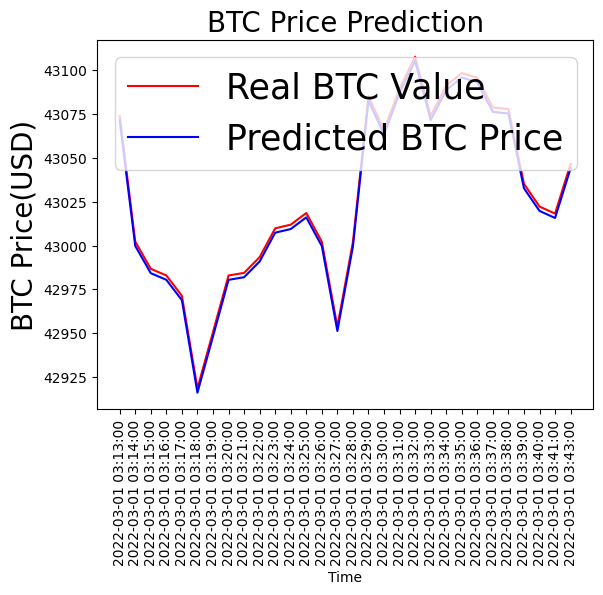

In [13]:
# Visualising the results
plt.figure(figsize=(1,15), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Value')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=20)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price(USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()